In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data_file_name = '/Users/Jerry/Desktop/CSC373/jupyter notebook/adult.csv'

dataset = pd.read_csv(data_file_name)
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
dataset['income01']=dataset['income'].map({'<=50K':0,'>50K':1})
dataset.drop("income",axis=1,inplace=True)
dataset['income01'].value_counts()

0    24720
1     7841
Name: income01, dtype: int64

In [15]:
dataset = dataset.replace('?', np.nan)
dataset=pd.get_dummies(dataset, drop_first = True)
dataset.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income01,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Bagging!

### In order to avoid errors, I use a subset of my dataset to do bagging. I use the first 100 rows.

In [16]:
from random import choices
data = dataset.head(100)
index = range(100)
index_select = choices(index, k=100)
index_select

[17,
 94,
 28,
 31,
 25,
 43,
 23,
 48,
 89,
 99,
 48,
 83,
 44,
 26,
 45,
 32,
 61,
 47,
 87,
 42,
 87,
 79,
 87,
 20,
 10,
 95,
 84,
 37,
 61,
 76,
 50,
 5,
 96,
 99,
 33,
 44,
 51,
 82,
 87,
 4,
 88,
 78,
 87,
 76,
 82,
 14,
 33,
 79,
 79,
 4,
 47,
 68,
 46,
 77,
 61,
 57,
 97,
 9,
 86,
 59,
 29,
 40,
 25,
 52,
 9,
 51,
 71,
 54,
 75,
 86,
 18,
 46,
 13,
 57,
 84,
 39,
 21,
 65,
 58,
 38,
 90,
 45,
 54,
 0,
 90,
 75,
 26,
 7,
 95,
 12,
 53,
 84,
 6,
 2,
 58,
 3,
 21,
 31,
 56,
 45]

In [17]:
bag1 = data.iloc[index_select,:]
bag1

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income01,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
17,57,317847,14,0,2824,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
94,31,252752,9,0,2415,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,37,107164,6,0,2559,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31,59,107287,6,0,2559,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25,21,34310,11,0,2603,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21,29,77009,7,0,2754,42,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
31,59,107287,6,0,2559,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56,53,313243,10,0,2444,45,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Suppose we want to create 200 bootstrap samples.

In [18]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# create 200 bootstrap samples
for i in range(200):
    
    # list all index from 0 to 100
    index = range(100)
    
    # sample the index with replacement
    index_select = choices(index, k=100)
    
    # rebuild bootstrap dataset using the index selected
    bag1 = data.iloc[index_select,:]
    
    # select y(class)
    y = bag1["income01"]

    # extract X
    X = bag1.drop('income01', 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
    # Create Decision Tree classifer object
    clf_simple = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf_simple.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_simple.predict(X_test)

# I failed! Implementing decision tree with bagging is too hard. I don't know how to make prediction based on each bagging result.

# I decide to implement bagging with linear regression and compare the fitted regression line of different bootstrap examples.

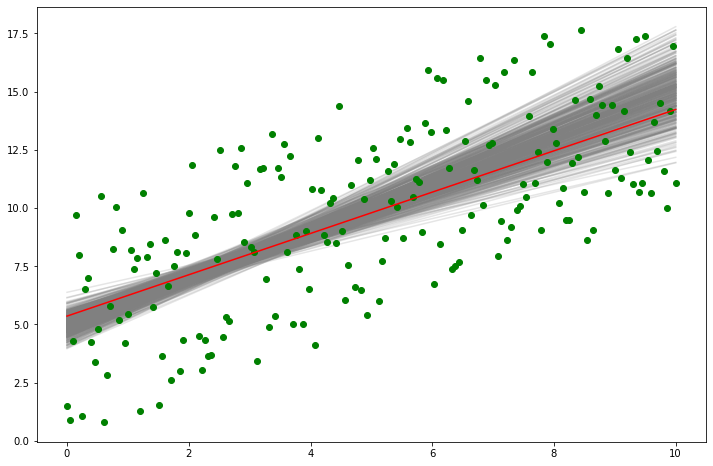

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create 200 data points randomly
x = np.linspace(0, 10, 200)
y = x + (np.random.rand(len(x)) * 10)

# The model matrix contain another row vector of 1s
X = np.vstack([x, np.ones(len(x))]).T

plt.figure(figsize=(12,8))
for i in range(0, 500):
    index = range(100)
    index_select = choices(index, k=200)

    X_samples = X[index_select]
    y_samples = y[index_select]    

    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    plt.plot(x, lr.predict(X), color='grey', alpha=0.2, zorder=1)

plt.scatter(x,y, marker='o', color='green', zorder=4)

# fitted regression line for original dataset
lr = LinearRegression()
lr.fit(X, y)
plt.plot(x, lr.predict(X), color='red', zorder=5)

# The green dots are our original dataset and the red line is the fitted line of original dataset. All grey lines are fitted regression line for each bootstrap samples.